#DATA CLEANING

In [9]:
import pandas as pd

# Load the dataset
file_path = 'PoliceKillingsUS.csv'  # Replace with the actual path
data = pd.read_csv(file_path, encoding='latin1') # Specify the encoding as 'latin1' or 'ISO-8859-1'

# Replace missing values with the mean of their respective columns
data.fillna(data.mean(numeric_only=True), inplace=True)

# Print the first few rows to confirm
print(data.head())

   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2 

#VARIABLES THAT ARE ASSOSIATED

In [11]:
import pandas as pd

# Load the dataset
file_path = 'PoliceKillingsUS.csv'  # Replace with your file path
data = pd.read_csv(file_path, encoding='latin1')

# Print the column names (variables)
print("Associated Variables in the Dataset:")
for column in data.columns:
    print(column)


Associated Variables in the Dataset:
id
name
date
manner_of_death
armed
age
gender
race
city
state
signs_of_mental_illness
threat_level
flee
body_camera


#VARIABLES THAT ARE ASSIOSIATED

In [12]:
# Print unique values for each variable to explore possible associations
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print("\n")

# Explore conditional relationships (example: 'state' and 'city')
state_city_group = data.groupby('state')['city'].unique()
print("Cities associated with each state:")
print(state_city_group)


Unique values in 'id':
[   3    4    5 ... 2818 2817 2815]


Unique values in 'name':
['Tim Elliot' 'Lewis Lee Lembke' 'John Paul Quintero' ...
 'Dennis W. Robinson' 'Isaiah Tucker' 'Dwayne Jeune']


Unique values in 'date':
['02/01/15' '03/01/15' '04/01/15' '05/01/15' '06/01/15' '07/01/15'
 '08/01/15' '09/01/15' '11/01/15' '13/01/15' '14/01/15' '15/01/15'
 '16/01/15' '17/01/15' '18/01/15' '19/01/15' '20/01/15' '21/01/15'
 '22/01/15' '23/01/15' '24/01/15' '25/01/15' '26/01/15' '27/01/15'
 '28/01/15' '29/01/15' '30/01/15' '31/01/15' '02/02/15' '03/02/15'
 '04/02/15' '05/02/15' '06/02/15' '07/02/15' '08/02/15' '09/02/15'
 '10/02/15' '11/02/15' '13/02/15' '14/02/15' '15/02/15' '16/02/15'
 '17/02/15' '18/02/15' '20/02/15' '21/02/15' '22/02/15' '23/02/15'
 '24/02/15' '25/02/15' '26/02/15' '27/02/15' '28/02/15' '01/03/15'
 '02/03/15' '03/03/15' '04/03/15' '05/03/15' '06/03/15' '07/03/15'
 '08/03/15' '09/03/15' '10/03/15' '11/03/15' '12/03/15' '13/03/15'
 '14/03/15' '15/03/15' '16/03/15' '17/

#DEPENDENCE VARIABLES

   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2 

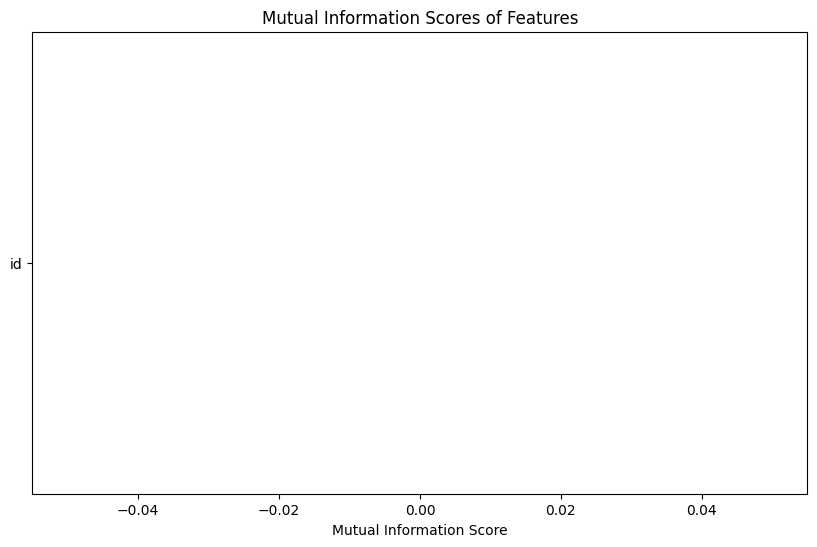

In [10]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import numpy as np

# Load the dataset, specifying the encoding as 'latin1' to handle special characters
data = pd.read_csv('PoliceKillingsUS.csv', encoding='latin1')
# The 'encoding' parameter is set to 'latin1' to properly decode the file.

# Display the first few rows of the dataset
print(data.head())

# Select numerical features for analysis
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

# Replace 'target_variable' with your actual target variable name
target_variable = 'age'  # Changed this to an actual numerical column in the dataset
# Ensure that the target variable is present in the DataFrame and is numerical

# Before calculating MI scores, handle NaN values in the target variable
# Here, we replace NaNs with the mean of the 'age' column
data[target_variable] = data[target_variable].fillna(data[target_variable].mean())

# Calculate mutual information for each feature with respect to the target variable
mi_scores = mutual_info_regression(data[numerical_features].drop(target_variable, axis=1), data[target_variable])

# Create a DataFrame to display the scores
mi_scores_df = pd.DataFrame({'Feature': numerical_features[:-1], 'Mutual Information Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='Mutual Information Score', ascending=False)

# Display the mutual information scores
print(mi_scores_df)

# Optionally, visualize the scores with a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(mi_scores_df['Feature'], mi_scores_df['Mutual Information Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores of Features')
plt.show()

#CORRELATION MATRIX

   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2 

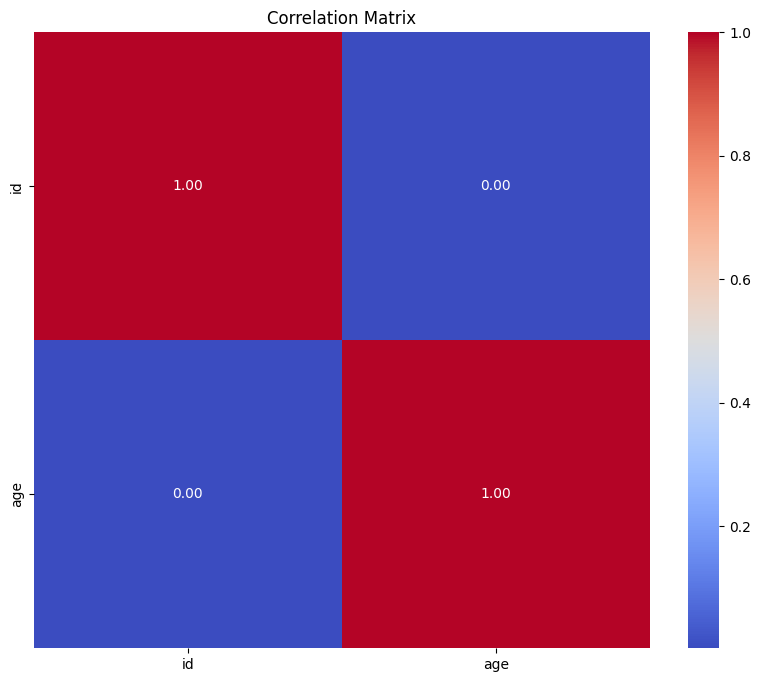

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset, specifying the encoding as 'latin1' to handle special characters
data = pd.read_csv('PoliceKillingsUS.csv', encoding='latin1')

# Display the first few rows of the dataset
print(data.head())

# Calculate the correlation matrix, only including numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr() # Changed this line to select numeric columns first

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

#CAUSATION OF VARIABLES

In [15]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load the dataset, specifying the encoding as 'latin1' to handle special characters
data = pd.read_csv('PoliceKillingsUS.csv', encoding='latin1')
# The 'encoding' parameter is set to 'latin1' or 'ISO-8859-1' to properly decode the file.

# Display the first few rows of the dataset
print(data.head())

# Select two time series variables for causation analysis
# Replace 'variable1' and 'variable2' with your actual variable names
# These should be valid column names from your dataset
variable1 = 'age'  # Replace with a suitable column name
variable2 = 'signs_of_mental_illness'  # Replace with another suitable column name

# **Replace 'date' with the actual name of your time column if it's not 'date'**
# Assuming 'date' is a column in your dataset containing date information
data['date'] = pd.to_datetime(data['date'])  # Convert 'date' column to datetime objects
data = data.sort_values(by='date')  # Sort by the 'date' column

# Handle missing values before performing the Granger Causality test
# You can choose one of the following methods:

# 1. Drop rows with missing values in the selected columns:
data = data.dropna(subset=[variable1, variable2])

# 2. Replace missing values with a specific value (e.g., 0 or the mean):
# data[variable1] = data[variable1].fillna(data[variable1].mean())
# data[variable2] = data[variable2].fillna(data[variable2].mean())


# Perform Granger Causality test
max_lag = 5  # You can adjust the maximum lag based on your analysis
test_result = grangercausalitytests(data[[variable1, variable2]], max_lag, verbose=True)

# The output will show the test statistics for each lag

   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2   5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4   9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2 

<ipython-input-15-a0919d550eac>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])  # Convert 'date' column to datetime objects
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


#TASK 2 ( VISLUALIZATION )

<ipython-input-18-23f00add0d8d>:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])  # Ensure your date column is in datetime format
<ipython-input-18-23f00add0d8d>:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('date').resample('M')['age'].mean().plot(ax=axes[7])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 86.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 72.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-package

Text(0.5, 0.98, 'Age Distribution by Gender')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 87.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 74.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 87.4% of the points cannot be place

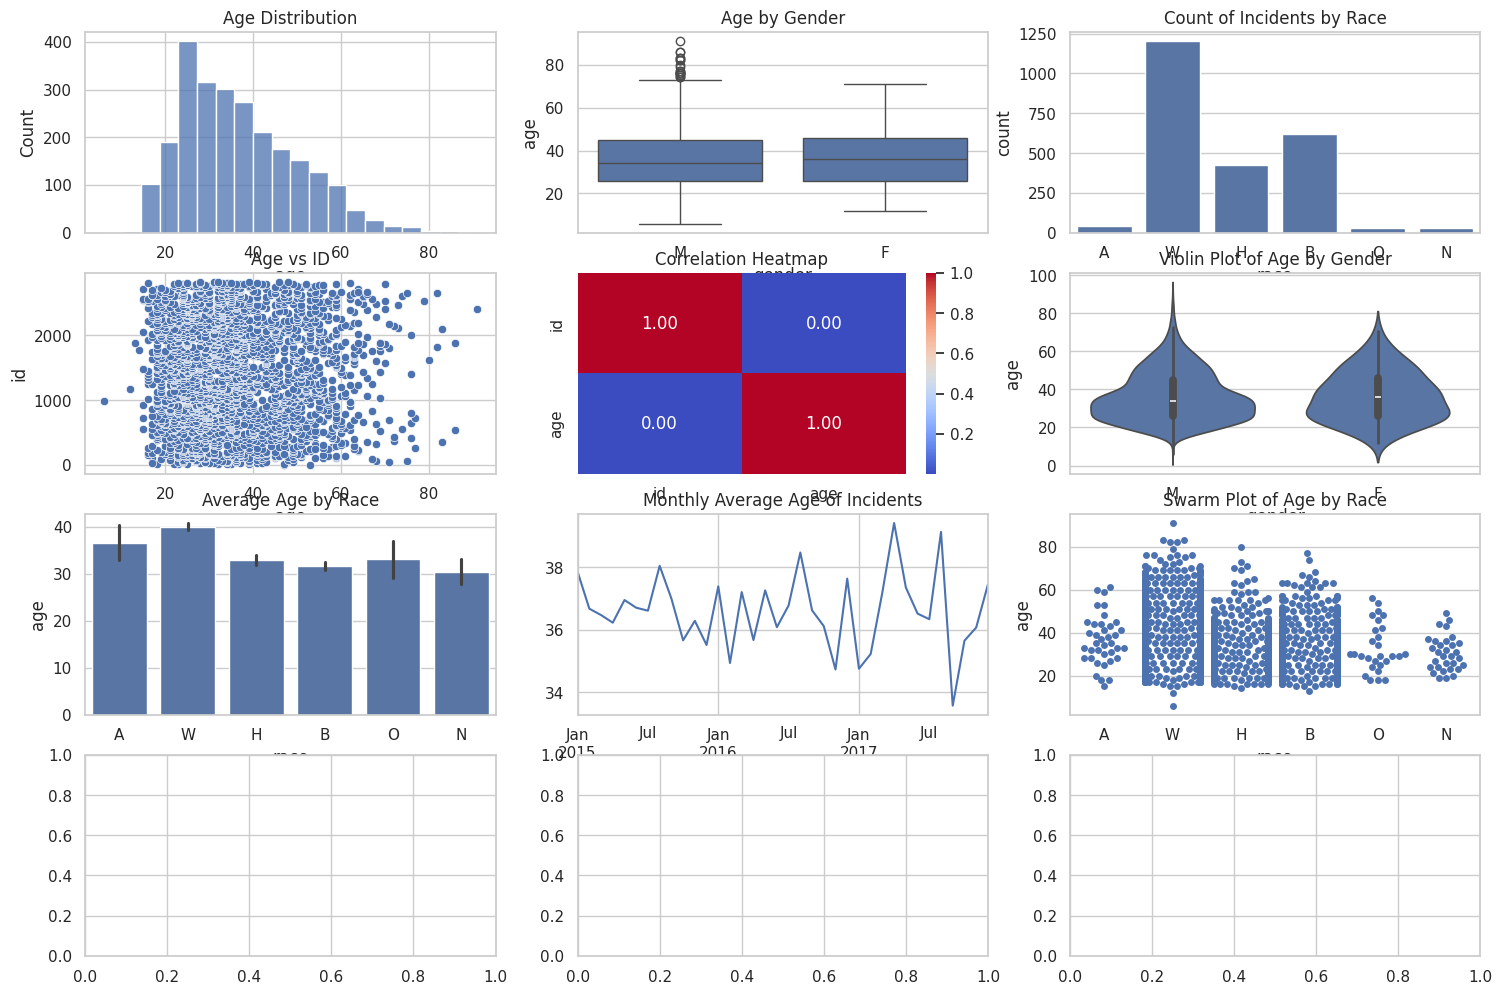

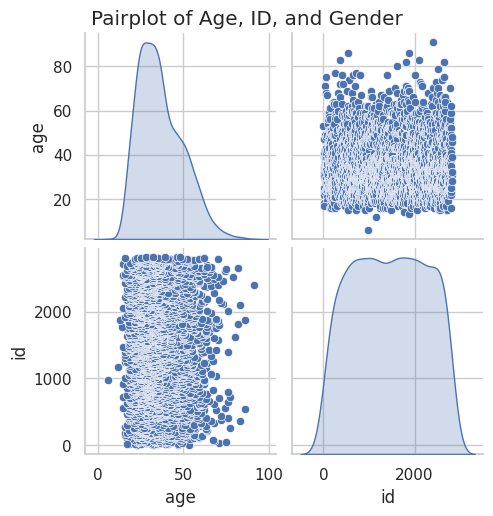

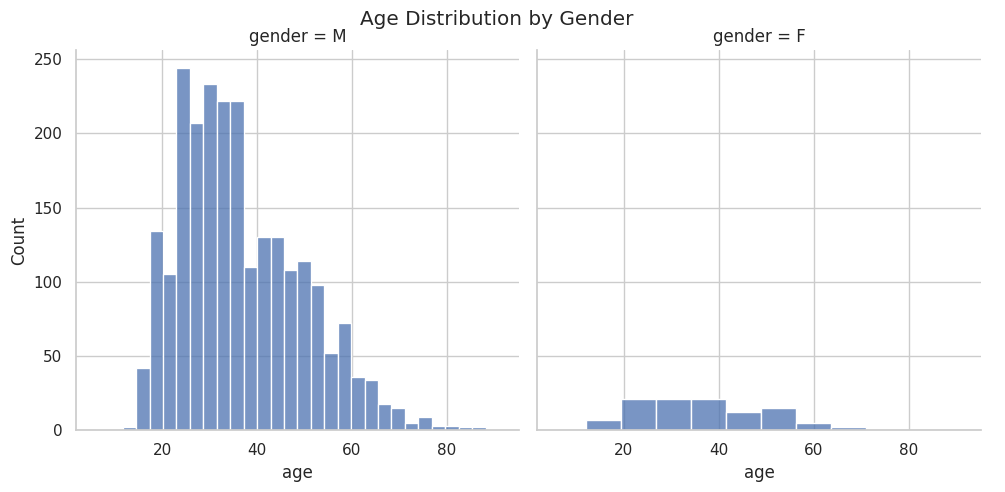

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset, specifying the encoding as 'latin1' to handle special characters
data = pd.read_csv('PoliceKillingsUS.csv', encoding='latin1')  # Change encoding to 'latin1' or 'ISO-8859-1'

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure to hold multiple subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  # 4 rows and 3 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

# 1. Histogram
sns.histplot(data['age'], bins=20, ax=axes[0])
axes[0].set_title('Age Distribution')

# 2. Boxplot
sns.boxplot(x='gender', y='age', data=data, ax=axes[1])
axes[1].set_title('Age by Gender')

# 3. Countplot
sns.countplot(x='race', data=data, ax=axes[2])
axes[2].set_title('Count of Incidents by Race')

# 4. Scatter plot
# Replace 'income' with a relevant numerical variable if 'income' is not present or causing errors
sns.scatterplot(x='age', y='id', data=data, ax=axes[3])
axes[3].set_title('Age vs ID')

# 5. Pairplot (Note: This will not fit in a subplot; it's a separate plot)
# Replace with relevant numerical variables if 'income' is not present
sns.pairplot(data[['age', 'id', 'gender']], diag_kind='kde')
plt.suptitle('Pairplot of Age, ID, and Gender', y=1.02)

# 6. Heatmap of correlations
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()  # Calculate correlation on numerical data
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[4])
axes[4].set_title('Correlation Heatmap')

# 7. Violin plot
sns.violinplot(x='gender', y='age', data=data, ax=axes[5])
axes[5].set_title('Violin Plot of Age by Gender')

# 8. Bar plot
sns.barplot(x='race', y='age', data=data, ax=axes[6], estimator=np.mean)
axes[6].set_title('Average Age by Race')

# 9. Line plot (assuming time series data)
data['date'] = pd.to_datetime(data['date'])  # Ensure your date column is in datetime format
data.set_index('date').resample('M')['age'].mean().plot(ax=axes[7])
axes[7].set_title('Monthly Average Age of Incidents')

# 10. Swarm plot
sns.swarmplot(x='race', y='age', data=data, ax=axes[8])
axes[8].set_title('Swarm Plot of Age by Race')

# 11. FacetGrid for multiple plots (example with gender)
g = sns.FacetGrid(data, col="gender", height=5)
g.map(sns.histplot, "age")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Gender')

# Adjust layout to prevent overlap
